,Твитнуть,Самоубийство
0,готовлю обед,Не суицидный пост
1,Тебе нужны его деньги.,Не суицидный пост
2,"мне потребовалась целая вечность, чтобы собрать эту ерунду. я собираюсь пойти спать на несколько ДНЕЙ",Пост о потенциальном самоубийстве
3,"Привет, Джер! С каких это пор ты начал твиттерить?",Не суицидный пост
4,"Пробуем «Вкусную библиотеку 2»; с неоднозначными результатами. Штрихкод подумал, что я хочу добавить спортивный бюстгальтер вместо тренировки. Крутое приложение!",Не суицидный пост
5,"О, приятно это слышать. Но неужели все уже закончилось? Или вы продолжите это после Страстной недели?",Не суицидный пост
6,"у тебя есть список других ? Тебе придется поделиться этим, Амиго!",Не суицидный пост
7,"То, что Шейн снял о тебе сериал, не означает, что люди воспринимают тебя всерьез, да…",Пост о потенциальном самоубийстве
8,Пришло время расслабиться в варшавском пивном саду,Не суицидный пост
9,"Я ненавижу свою жизнь, я надеюсь, что скоро умру или умру, я слишком устал от всего",Пост о потенциальном самоубийстве


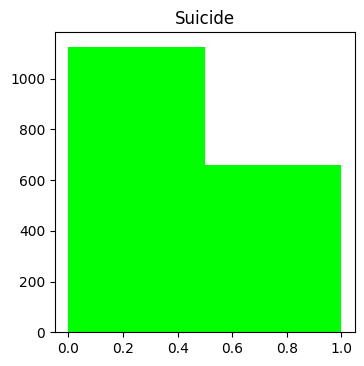

In [ ]:
import numpy as np 
import pandas as pd 
data = pd.read_csv('data/ru_Suicide.csv')
#Идентификация пропущенных значений (NaN, NULL, пустых строк и т. д.) в датафрейме
filtered_colums = data.eq("").sum()
# вводим дамми переменные для преобразования категориальных признаков в числовые для подсчета данных
data['Самоубийство']= data['Самоубийство'].astype(str)
data_dummies = pd.get_dummies(data['Самоубийство'], drop_first=True, dummy_na=False)
bool_counts = data_dummies.select_dtypes(include='bool').apply(lambda x: x.value_counts())
# изменяем булевые переменные на двоичный код (1 и 0), для удобного подсчета в графике
data_dummies['Пост о потенциальном самоубийстве'] = data_dummies['Пост о потенциальном самоубийстве'].astype(int)
# построим гистограмму для того, чтобы оценить наличие или отсутствие выбросов данных 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0,0,1,1])
axes.hist(x=data_dummies['Пост о потенциальном самоубийстве'], label= ['Suicide'], color = 'lime', bins = 2)
axes.set_title('Suicide')
# используем IPython.display для красивого вывода всего текста в таблице
from IPython.display import display, HTML
#удаляем ссылки и лишние символы
data['Твитнуть'] = data['Твитнуть'].replace(r'http[s]?://\S+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'@\w+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'/+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'&\w+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'ð\w+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'¶+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'RT', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'aâ¦', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'@', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'w\w+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r':', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'#\w+', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'_', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'-', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'ð', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'ó', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'¦', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'§', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'®', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'¥', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'¢', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'´', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'¿', '', regex=True)
data['Твитнуть'] = data['Твитнуть'].replace(r'Ã¯ÂÂ½', '', regex=True)
#Удалим некачественные строки
data1 = data.drop(index=[497, 505, 536, 1002, 1017, 1047])
#Снова посчитаем данные о количестве постов 
data_dummies1 = pd.get_dummies(data1['Самоубийство'], drop_first=True, dummy_na=False)
bool_counts1 = data_dummies1.select_dtypes(include='bool').apply(lambda x: x.value_counts())
# сохраним новый вариант Датасета
data1.to_csv('data/ru_Suicide_new.csv', index=False, sep=';')
display(HTML(data1.to_html())) #при использовании такого формата удаляется строка вместе с индексом, и идет 503, 504, 506, но при использовании обычного дата фрейма, все хорошо, и основной дата фрейм имеет нужное количество строк
